# Jupyter notebook (Caracterización de redes y topologías biológicas)
Autores: **Diego Mañanes Cayero** y **Alejandro Martín Muñoz**

## Práctica 2: Gráfos Aleatorios, Regulares, de Mundo pequeño y libres de escala

### Estudiar las propiedeades de un grafo aleatorio.

**a. Usando la función gnp_random_graph(n,p) de NetworkX Implementad una rutina Python L_C_Aleatorio que devuelva el valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos aleatorios de n nodos y probabilidad p.** El formato de la función debe ser:

``[l,c] = L_C_Aleatorio(n_graph,n,p)``

In [2]:
# En primer lugar, hay que importar las librerías necesarias

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def LC_Aleatorio(n_graph, n, P):
    C = []
    L = []
    for graph in range(n_graph):
        G = nx.gnp_random_graph(n, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
    return n_graph, n, P, round(sum(C)/len(C), 3), round(sum(L)/len(L), 3)

Cuanndo el grafo no es conexo coge como L n-1 porque es el valor máximo de camino característico. Podría poner Inf, pero sale mal gráficamente


parap intalas juntas se podría dividir por el máximo para hacer que estén en la misma escala. 

**b. Usando la rutina anterior, dibujar el comportamiento de L, C para distintos valores de la probabilidad p y un número fijo de nodos.** Tomad n=400, n_graph=20 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

Dibujad una gráfica que describa el comportamiento de estos dos parámetros como función de p, usad escala logarítmica en el eje x.

¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?

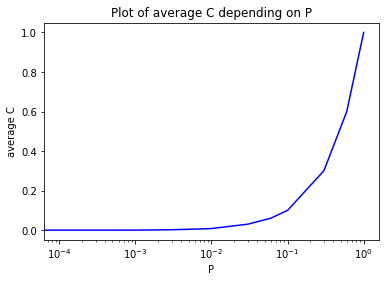

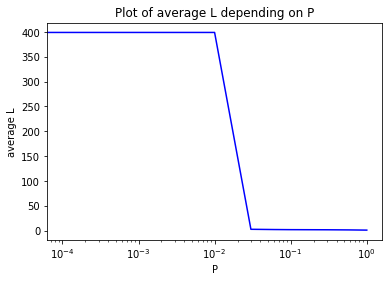

In [3]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]
C_results = []
L_results = []
for P in Probs:
    Indiv_results = LC_Aleatorio(20, 400, P)
    C_results.append(Indiv_results[3])
    L_results.append(Indiv_results[4])

plt.plot(Probs, C_results, color='b')
plt.title("Plot of average C depending on P")
plt.ylabel("average C")
plt.xlabel("P")
plt.xscale("log", nonposx='clip')
plt.show();

plt.plot(Probs, L_results, color='b')
plt.title("Plot of average L depending on P")
plt.ylabel("average L")
plt.xlabel("P")
plt.xscale("log", nonposx='clip')
plt.show();

Como se puede observar en la primera gráfica, el comportamiento de C cambia para P = 0.1 (10 elvado a -1). Como se puede observar en la segunda gráfica, el comportamiento de L cambia para P = 0.03 (10 elevado a -1.5).

### Redes regulares y de mundo pequeño

**a. Usando la función de NetworkX watts_strogatz_graph(n, k, p) implementad una rutina Python L_C_small_world(n_graph, n, k, p) que devuelva valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) para un conjunto de n_graph grafos de tipo Small World.** El formato de la función debe ser:

`` [l,c] = L_C_Small_World(n_graph,n,k,p)``

Nota: En el caso de que el grafo no sea conexo, usad el valor n-1 para L en ese grafo.


In [4]:
def L_C_Small_World(n_graph, n, k, P):
    C = []
    L = []
    for graph in range(n_graph):
        G = nx.watts_strogatz_graph(n, k, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
    return n_graph, n, k, P, round(sum(C)/len(C), 3), round(sum(L)/len(L), 3)

**b. Usando la rutina anterior, generar una gráfica con el comportamiento de C y L para distintos valores de la probabilidad p y un número fijo de nodos y ramas.** Tomar N=400, k=8 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.].

¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C? ¿Entre que valores de p dirías que está la zona de Small-World para estos valores de N y k. ¿Corresponde el valor de p observado con el valor de p teórico para el cambio de fase en el comportamiento del camino característico?

Comparar las gráficas obtenidas de C y L con las correspondientes gráficas teóricas.

Con los datos que obtuviste en la práctica 1. ¿Dirías que la red de interacción de proteínas del Caernobidis Elegans puede ser considerada una red de mundo pequeño? Razona la respuesta.

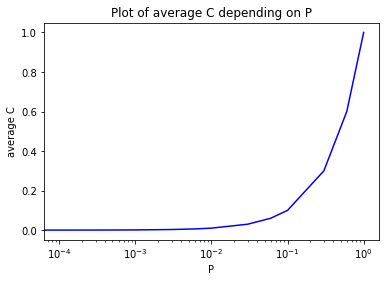

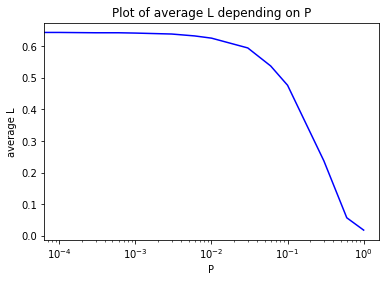

In [5]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]
C_results = []
L_results = []
for P in Probs:
    Indiv_results = L_C_Small_World(20, 400, 8, P)
    C_results.append(Indiv_results[3])
    L_results.append(Indiv_results[4])

plt.plot(Probs, C_results, color='b')
plt.title("Plot of average C depending on P")
plt.ylabel("average C")
plt.xlabel("P")
plt.xscale("log", nonposx='clip')
plt.show();

plt.plot(Probs, L_results, color='b')
plt.title("Plot of average L depending on P")
plt.ylabel("average L")
plt.xlabel("P")
plt.xscale("log", nonposx='clip')
plt.show();

Explicación

### Redes libres de Escala

**a. Generar una red libre de escala con 10000 nodos y que añade 10 nodos en cada paso (utilizad la rutina barabasi_albert_graph(n, m)).** Calculad los valores de L, C y la distribución de grado de los nodos. Generad una red aleatoria que tenga el mismo número de nodos y ramas que la red que habéis creado, calculad sus valores de L, C y la distribución del grado de los nodos y comparad los valores obtenidos.

In [ ]:
G_SF = nx.barabasi_albert_graph(10000, 10)
C = nx.average_clustering(G_SF)
L = nx.average_shortest_path_length(G_SF)
m = nx.number_of_edges(G_SF)
Degree_dist = nx.degree_histogram(G_SF)

print(C, L)

plt.bar(range(len(Degree_dist)), Degree_dist, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show();

G_AL = nx.gnm_random_graph(10000, m)
C = nx.average_clustering(G_AL)
L = nx.average_shortest_path_length(G_AL)
Degree_dist = nx.degree_histogram(G_AL)

print(C, L)

plt.bar(range(len(Degree_dist)), Degree_dist, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show();

Explicación